In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# LinearRegression()  model can be used from linear_model module
from sklearn import linear_model

# OSL() model can be used from statmodels package
import statsmodels.api as sm

# we will perform sampling using train_test_split module for training and testin set
# and we will use GridSearchCV to find the best parameters for SGDRegressor()
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

# we will evaluate our models using RMSE(mean_squared_error) and Determination coefficient(r2_score)
from sklearn.metrics import mean_squared_error, r2_score

# in case you will use polinominal features
from sklearn.preprocessing import PolynomialFeatures

from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics

# 1. Take a first look at your data

In [4]:
data = pd.read_csv("Data.csv")
dataset = data.iloc[1::2]
dataset.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
5,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Some college or technical school,EDU,EDUCOTEC
7,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Age (years),18 - 24,AGEYR,AGEYR1824
9,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Age (years),35 - 44,AGEYR,AGEYR3544


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26696 entries, 1 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   26696 non-null  int64  
 1   YearEnd                     26696 non-null  int64  
 2   LocationAbbr                26696 non-null  object 
 3   LocationDesc                26696 non-null  object 
 4   Datasource                  26696 non-null  object 
 5   Class                       26696 non-null  object 
 6   Topic                       26696 non-null  object 
 7   Question                    26696 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             26696 non-null  object 
 10  Data_Value                  24207 non-null  float64
 11  Data_Value_Alt              24207 non-null  float64
 12  Data_Value_Footnote_Symbol  2489 non-null   object 
 13  Data_Value_Footnote         248

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
YearStart,26696.0,2013.281353,1.693545,2011.0,2012.0,2013.0,2015.0,2016.0
YearEnd,26696.0,2013.281353,1.693545,2011.0,2012.0,2013.0,2015.0,2016.0
Data_Value_Unit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,24207.0,31.112600,10.227581,2.1,24.1,30.7,36.9,77.6
Data_Value_Alt,24207.0,31.112600,10.227581,2.1,24.1,30.7,36.9,77.6
Low_Confidence_Limit,24207.0,26.877849,10.019014,0.4,20.0,26.4,32.8,69.0
High_Confidence_Limit,24207.0,35.908217,11.198406,5.1,28.2,35.4,42.1,86.8
Sample_Size,24207.0,3816.402528,18488.302948,50.0,570.0,1241.0,2599.0,454894.0
LocationID,26696.0,30.296486,16.827207,1.0,17.0,30.0,44.0,78.0


In [7]:
dataset["Sample_Size"]

1        2581.0
3        1153.0
5        1925.0
7         356.0
9         865.0
          ...  
53383     137.0
53385     820.0
53387       NaN
53389       NaN
53391       NaN
Name: Sample_Size, Length: 26696, dtype: float64

# 2. Data preparation 
(handling missing values, outliers, irrelevant data,
format, data types, detecting the features and target value, dividing into
train and test sets) 

In [8]:
# It is noticeable that the number of empty values is too much
dataset.isnull().sum().sort_values(ascending=False)

Data_Value_Unit               26696
Total                         25709
Gender                        24768
Data_Value_Footnote_Symbol    24207
Data_Value_Footnote           24207
Education                     22870
Age(years)                    20981
Income                        20066
Race/Ethnicity                19086
High_Confidence_Limit          2489
Low_Confidence_Limit           2489
Sample_Size                    2489
Data_Value                     2489
Data_Value_Alt                 2489
GeoLocation                     507
TopicID                           0
QuestionID                        0
ClassID                           0
DataValueTypeID                   0
LocationID                        0
StratificationCategory1           0
Stratification1                   0
StratificationCategoryId1         0
YearStart                         0
YearEnd                           0
Data_Value_Type                   0
Question                          0
Topic                       

In [9]:
dataset["TopicID"].unique

<bound method Series.unique of 1        OWS1
3        OWS1
5        OWS1
7        OWS1
9        OWS1
         ... 
53383     PA1
53385     PA1
53387     PA1
53389     PA1
53391     PA1
Name: TopicID, Length: 26696, dtype: object>

In [10]:
# Looking for unique values by columns
for columns in dataset.columns:
    print(columns,": ",dataset[columns].unique())

YearStart :  [2011 2012 2014 2013 2015 2016]
YearEnd :  [2011 2012 2014 2013 2015 2016]
LocationAbbr :  ['AL' 'US' 'AK' 'AZ' 'AR' 'CA' 'CT' 'CO' 'DE' 'FL' 'DC' 'GA' 'GU' 'HI'
 'ID' 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO'
 'MT' 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'PR'
 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WI' 'WY' 'WV' 'VI']
LocationDesc :  ['Alabama' 'National' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Connecticut' 'Colorado' 'Delaware' 'Florida' 'District of Columbia'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'W

In [11]:
# # Deleted data because they are repeated (The same data or abbreviations), or contain empty values
dataset = dataset.drop(columns = "Data_Value_Unit")
dataset = dataset.drop(columns = "Total")
dataset = dataset.drop(columns = "Datasource")
dataset = dataset.drop(columns = "Data_Value_Type")
dataset = dataset.drop(columns = "Data_Value_Footnote_Symbol")
dataset = dataset.drop(columns = "DataValueTypeID")
dataset = dataset.drop(columns = "LocationAbbr")
dataset = dataset.drop(columns = "Data_Value_Footnote")
dataset = dataset.drop(columns = "GeoLocation")
dataset = dataset.drop(columns = "LocationID")
dataset = dataset.drop(columns = "TopicID")
dataset = dataset.drop(columns = "ClassID")
dataset = dataset.drop(columns = "Gender")
dataset = dataset.drop(columns = "Education")
dataset = dataset.drop(columns = "Age(years)")
dataset = dataset.drop(columns = "Race/Ethnicity")
dataset = dataset.drop(columns = "Income")

In [12]:
# Once again check the dataset for unnecessary columns
for columns in dataset.columns:
    print(columns,": ",dataset[columns].unique())

YearStart :  [2011 2012 2014 2013 2015 2016]
YearEnd :  [2011 2012 2014 2013 2015 2016]
LocationDesc :  ['Alabama' 'National' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Connecticut' 'Colorado' 'Delaware' 'Florida' 'District of Columbia'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'Wisconsin' 'Wyoming' 'West Virginia'
 'Virgin Islands']
Class :  ['Obesity / Weight Status' 'Fruits and Vegetables' 'Physical Activity']
Topic :  ['Obesity / Weight Status' 'Fruits and Vegetables - Behavior'
 'Physical Activity - Behavior']
Question :  ['Percent of adults aged 18 years and older 

In [13]:
# Check the values for empty strings againdataset.isnull().sum().sort_values(ascending=False)

In [14]:
# It is noticeable that the data is similar, you can delete one of the columns
dataset[["Data_Value","Data_Value_Alt"]]

,Data_Value,Data_Value_Alt
1,32.3,32.3
3,33.6,33.6
5,33.8,33.8
7,16.3,16.3
9,35.5,35.5
...,...,...
53383,25.3,25.3
53385,24.1,24.1
53387,NaN,NaN
53389,NaN,NaN


In [15]:
dataset = dataset.drop(columns = "Data_Value_Alt")

In [16]:
dataset.isnull().sum().sort_values(ascending=False)

Data_Value                   2489
Low_Confidence_Limit         2489
High_Confidence_Limit        2489
Sample_Size                  2489
YearStart                       0
YearEnd                         0
LocationDesc                    0
Class                           0
Topic                           0
Question                        0
QuestionID                      0
StratificationCategory1         0
Stratification1                 0
StratificationCategoryId1       0
StratificationID1               0
dtype: int64

In [17]:
dataset = dataset.dropna()

In [18]:
dataset.columns

Index(['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Question',
       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'QuestionID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [19]:
dataset.isnull().sum().sort_values(ascending=False)

YearStart                    0
YearEnd                      0
LocationDesc                 0
Class                        0
Topic                        0
Question                     0
Data_Value                   0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
QuestionID                   0
StratificationCategory1      0
Stratification1              0
StratificationCategoryId1    0
StratificationID1            0
dtype: int64

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24207 entries, 1 to 53385
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  24207 non-null  int64  
 1   YearEnd                    24207 non-null  int64  
 2   LocationDesc               24207 non-null  object 
 3   Class                      24207 non-null  object 
 4   Topic                      24207 non-null  object 
 5   Question                   24207 non-null  object 
 6   Data_Value                 24207 non-null  float64
 7   Low_Confidence_Limit       24207 non-null  float64
 8   High_Confidence_Limit      24207 non-null  float64
 9   Sample_Size                24207 non-null  float64
 10  QuestionID                 24207 non-null  object 
 11  StratificationCategory1    24207 non-null  object 
 12  Stratification1            24207 non-null  object 
 13  StratificationCategoryId1  24207 non-null  obj

In [21]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
YearStart,24207.0,2013.269261,1.693787,2011.0,2012.0,2013.0,2015.0,2016.0
YearEnd,24207.0,2013.269261,1.693787,2011.0,2012.0,2013.0,2015.0,2016.0
Data_Value,24207.0,31.112600,10.227581,2.1,24.1,30.7,36.9,77.6
Low_Confidence_Limit,24207.0,26.877849,10.019014,0.4,20.0,26.4,32.8,69.0
High_Confidence_Limit,24207.0,35.908217,11.198406,5.1,28.2,35.4,42.1,86.8
Sample_Size,24207.0,3816.402528,18488.302948,50.0,570.0,1241.0,2599.0,454894.0


In [22]:
dataset.shape

(24207, 15)

In [23]:
dataset_num = dataset.loc[:, dataset.dtypes != 'object']
dataset_num

,YearStart,YearEnd,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
1,2011,2011,32.3,29.9,34.7,2581.0
3,2011,2011,33.6,29.9,37.6,1153.0
5,2011,2011,33.8,31.0,36.8,1925.0
7,2011,2011,16.3,12.6,20.9,356.0
9,2011,2011,35.5,31.6,39.6,865.0
...,...,...,...,...,...,...
53377,2016,2016,30.6,22.1,40.7,207.0
53379,2016,2016,28.9,18.2,42.5,154.0
53381,2016,2016,29.8,19.1,43.3,159.0
53383,2016,2016,25.3,16.4,37.0,137.0


In [24]:
def Find_Outliers(df, clm):
    Q1 = df[clm].quantile(0.25)
    Q3 = df[clm].quantile(0.75)
    IQR = Q3 - Q1
    
    outliersList = df.index[(df[clm] < (Q1 - 1.5 * IQR)) |(df[clm] > (Q3 + 1.5 * IQR))]
    return outliersList

In [25]:
dataset.columns

Index(['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Question',
       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'QuestionID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [26]:
index_list = [] #Array (list) for indexes

#Code for finding outliers indexes across all columns
for columns in dataset_num.columns:
    index_list.extend(Find_Outliers(dataset_num, columns))


In [27]:
# # Decided to leave outliers to check how much they will affect the quality of data, spoiler: nothing
len(index_list)

3725

---

In [28]:
# We have allocated a separate dataset for categorical data
dataset_categorical = dataset.loc[:, dataset.dtypes == 'object']
dataset_categorical.head()

,LocationDesc,Class,Topic,Question,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,Gender,Male,GEN,MALE
3,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,Education,Less than high school,EDU,EDUHS
5,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,Education,Some college or technical school,EDU,EDUCOTEC
7,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,Age (years),18 - 24,AGEYR,AGEYR1824
9,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,Age (years),35 - 44,AGEYR,AGEYR3544


In [29]:
def LabelEncoder(data):
    LabelEncoder_ = preprocessing.LabelEncoder()
    for columns in data.columns:
            data.loc[:, columns] = LabelEncoder_.fit_transform(data.loc[:, columns])
    return data

In [30]:
data_encoded_cat = LabelEncoder(dataset_categorical)
data_cat_labelenc = data_encoded_cat
data_cat_labelenc

C:\Users\saiki\AppData\Local\Temp\ipykernel_11888\2700503050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, columns] = LabelEncoder_.fit_transform(data.loc[:, columns])


,LocationDesc,Class,Topic,Question,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,0,1,1,1,2,2,22,2,18
3,0,1,1,1,2,1,21,1,8
5,0,1,1,1,2,1,26,1,7
7,0,1,1,1,2,0,5,0,0
9,0,1,1,1,2,0,8,0,2
...,...,...,...,...,...,...,...,...,...
53377,49,2,2,6,8,3,20,3,16
53379,49,2,2,6,8,3,1,3,12
53381,49,2,2,6,8,3,3,3,14
53383,49,2,2,6,8,3,15,3,17


---

<AxesSubplot:>

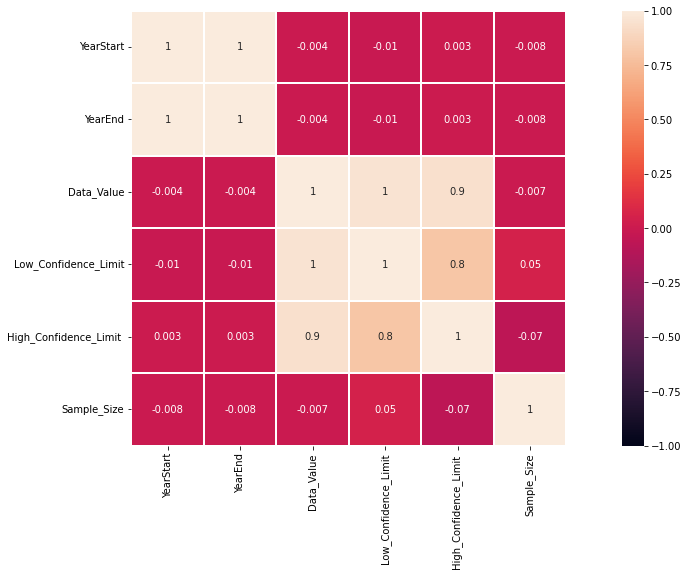

In [31]:
# The target value is [Data_Value]
# # There is a correlation with [Low_Confidence_Limit] and [High_Confidence_Limit]
ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(dataset.corr(), vmin = -1, vmax = 1, square=True, annot= True,linewidths = 2, fmt = '.1g')
ax

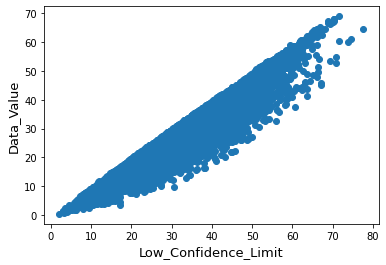

In [32]:
# # Positive correlation increases with [Low_Confidence_Limit], increases with [Data_Value]. It grows as a logarithm.
fig, ax = plt.subplots()
ax.scatter(x = dataset['Data_Value'], y = dataset['Low_Confidence_Limit'])
plt.ylabel('Data_Value', fontsize=13)
plt.xlabel('Low_Confidence_Limit', fontsize=13)
plt.show()

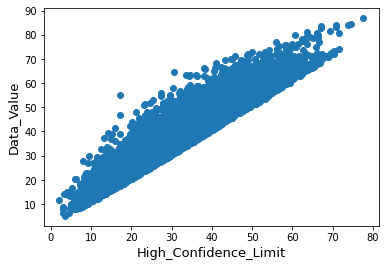

In [33]:
# # Positive correlation increases with [High_Confidence_Limit], increases with [Data_Value]. Grows as a linear function
fig, ax = plt.subplots()
ax.scatter(x = dataset['Data_Value'], y = dataset['High_Confidence_Limit '])
plt.ylabel('Data_Value', fontsize=13)
plt.xlabel('High_Confidence_Limit', fontsize=13)
plt.show()

---

In [34]:
X_dataframe = dataset[['Low_Confidence_Limit', 'High_Confidence_Limit ']]
target = dataset.Data_Value

In [35]:
print("X_dataframe shape:", X_dataframe.shape, "\nTarget value shape:", target.shape)

X_dataframe shape: (24207, 2) 
Target value shape: (24207,)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_dataframe, target, test_size=0.3, random_state=18)

In [37]:
lr_model = linear_model.LinearRegression()

In [38]:
print("Train data:",x_train.shape, y_train.shape, "\nTest data:",x_test.shape, y_test.shape)

Train data: (16944, 2) (16944,) 
Test data: (7263, 2) (7263,)


# 3. Model training and improvement 

3.1a Determine the target value for linear regression model and train 
LinearRegression() model, use MSE and r2_score metrics 

In [39]:
lr_model = linear_model.LinearRegression()

In [40]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [41]:
y_predicted_ls = lr_model.predict(x_test)

In [42]:
lr_model = linear_model.LinearRegression()

In [43]:
print('LinearRegression() MSE train: ', mean_squared_error(y_test, y_predicted_ls), '\nLinearRegression() R^2 train: ', r2_score(y_test, y_predicted_ls))

LinearRegression() MSE train:  0.13711416523819786 
LinearRegression() R^2 train:  0.9986899480994539


In [44]:
print(cross_val_score(lr_model, X_dataframe, target))

[0.99881523 0.99902543 0.99845337 0.99874878 0.99883291]


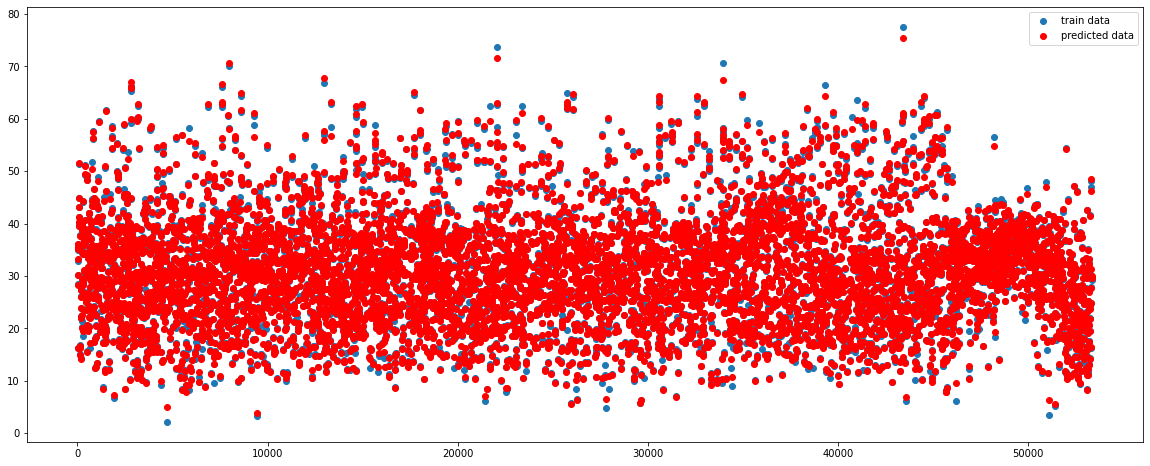

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.scatter(x_test.index, y_test, label='train data')
plt.scatter(x_test.index, y_predicted_ls, c='r', label='predicted data')
plt.legend();

3.1b Determine the target value for classification model and train 
DecisionTreeClassifier() model, use accuracy_score metric – 20 points

In [46]:
dataset_tree = dataset
dataset_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24207 entries, 1 to 53385
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  24207 non-null  int64  
 1   YearEnd                    24207 non-null  int64  
 2   LocationDesc               24207 non-null  object 
 3   Class                      24207 non-null  object 
 4   Topic                      24207 non-null  object 
 5   Question                   24207 non-null  object 
 6   Data_Value                 24207 non-null  float64
 7   Low_Confidence_Limit       24207 non-null  float64
 8   High_Confidence_Limit      24207 non-null  float64
 9   Sample_Size                24207 non-null  float64
 10  QuestionID                 24207 non-null  object 
 11  StratificationCategory1    24207 non-null  object 
 12  Stratification1            24207 non-null  object 
 13  StratificationCategoryId1  24207 non-null  obj

In [47]:
dataset_tree['Data_Value'] = dataset_tree['Data_Value'].astype(int)
dataset_tree['Low_Confidence_Limit'] = dataset_tree['Low_Confidence_Limit'].astype(int)
dataset_tree['High_Confidence_Limit '] = dataset_tree['High_Confidence_Limit '].astype(int)
dataset_tree['Sample_Size'] = dataset_tree['Sample_Size'].astype(int)
dataset_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24207 entries, 1 to 53385
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   YearStart                  24207 non-null  int64 
 1   YearEnd                    24207 non-null  int64 
 2   LocationDesc               24207 non-null  object
 3   Class                      24207 non-null  object
 4   Topic                      24207 non-null  object
 5   Question                   24207 non-null  object
 6   Data_Value                 24207 non-null  int32 
 7   Low_Confidence_Limit       24207 non-null  int32 
 8   High_Confidence_Limit      24207 non-null  int32 
 9   Sample_Size                24207 non-null  int32 
 10  QuestionID                 24207 non-null  object
 11  StratificationCategory1    24207 non-null  object
 12  Stratification1            24207 non-null  object
 13  StratificationCategoryId1  24207 non-null  object
 14  Strati

In [57]:
X_dataframe_tree = dataset_tree[['Low_Confidence_Limit', 'High_Confidence_Limit ']]
target_Tree = dataset_tree.Data_Value

In [58]:
print("X_dataframe shape:", X_dataframe_tree.shape, "\nTarget value shape:", target_Tree.shape)

X_dataframe shape: (24207, 2) 
Target value shape: (24207,)


In [59]:
x_train, x_test, y_train, y_test = train_test_split(X_dataframe_tree, target_Tree, test_size=0.3, random_state=18)

In [60]:
print("Train data:",x_train.shape, y_train.shape, "\nTest data:",x_test.shape, y_test.shape)

Train data: (16944, 2) (16944,) 
Test data: (7263, 2) (7263,)


In [61]:
model = tree.DecisionTreeClassifier(max_depth = 4)

In [62]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [63]:
y_predicted = model.predict(x_test)

In [64]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.26118683739501586


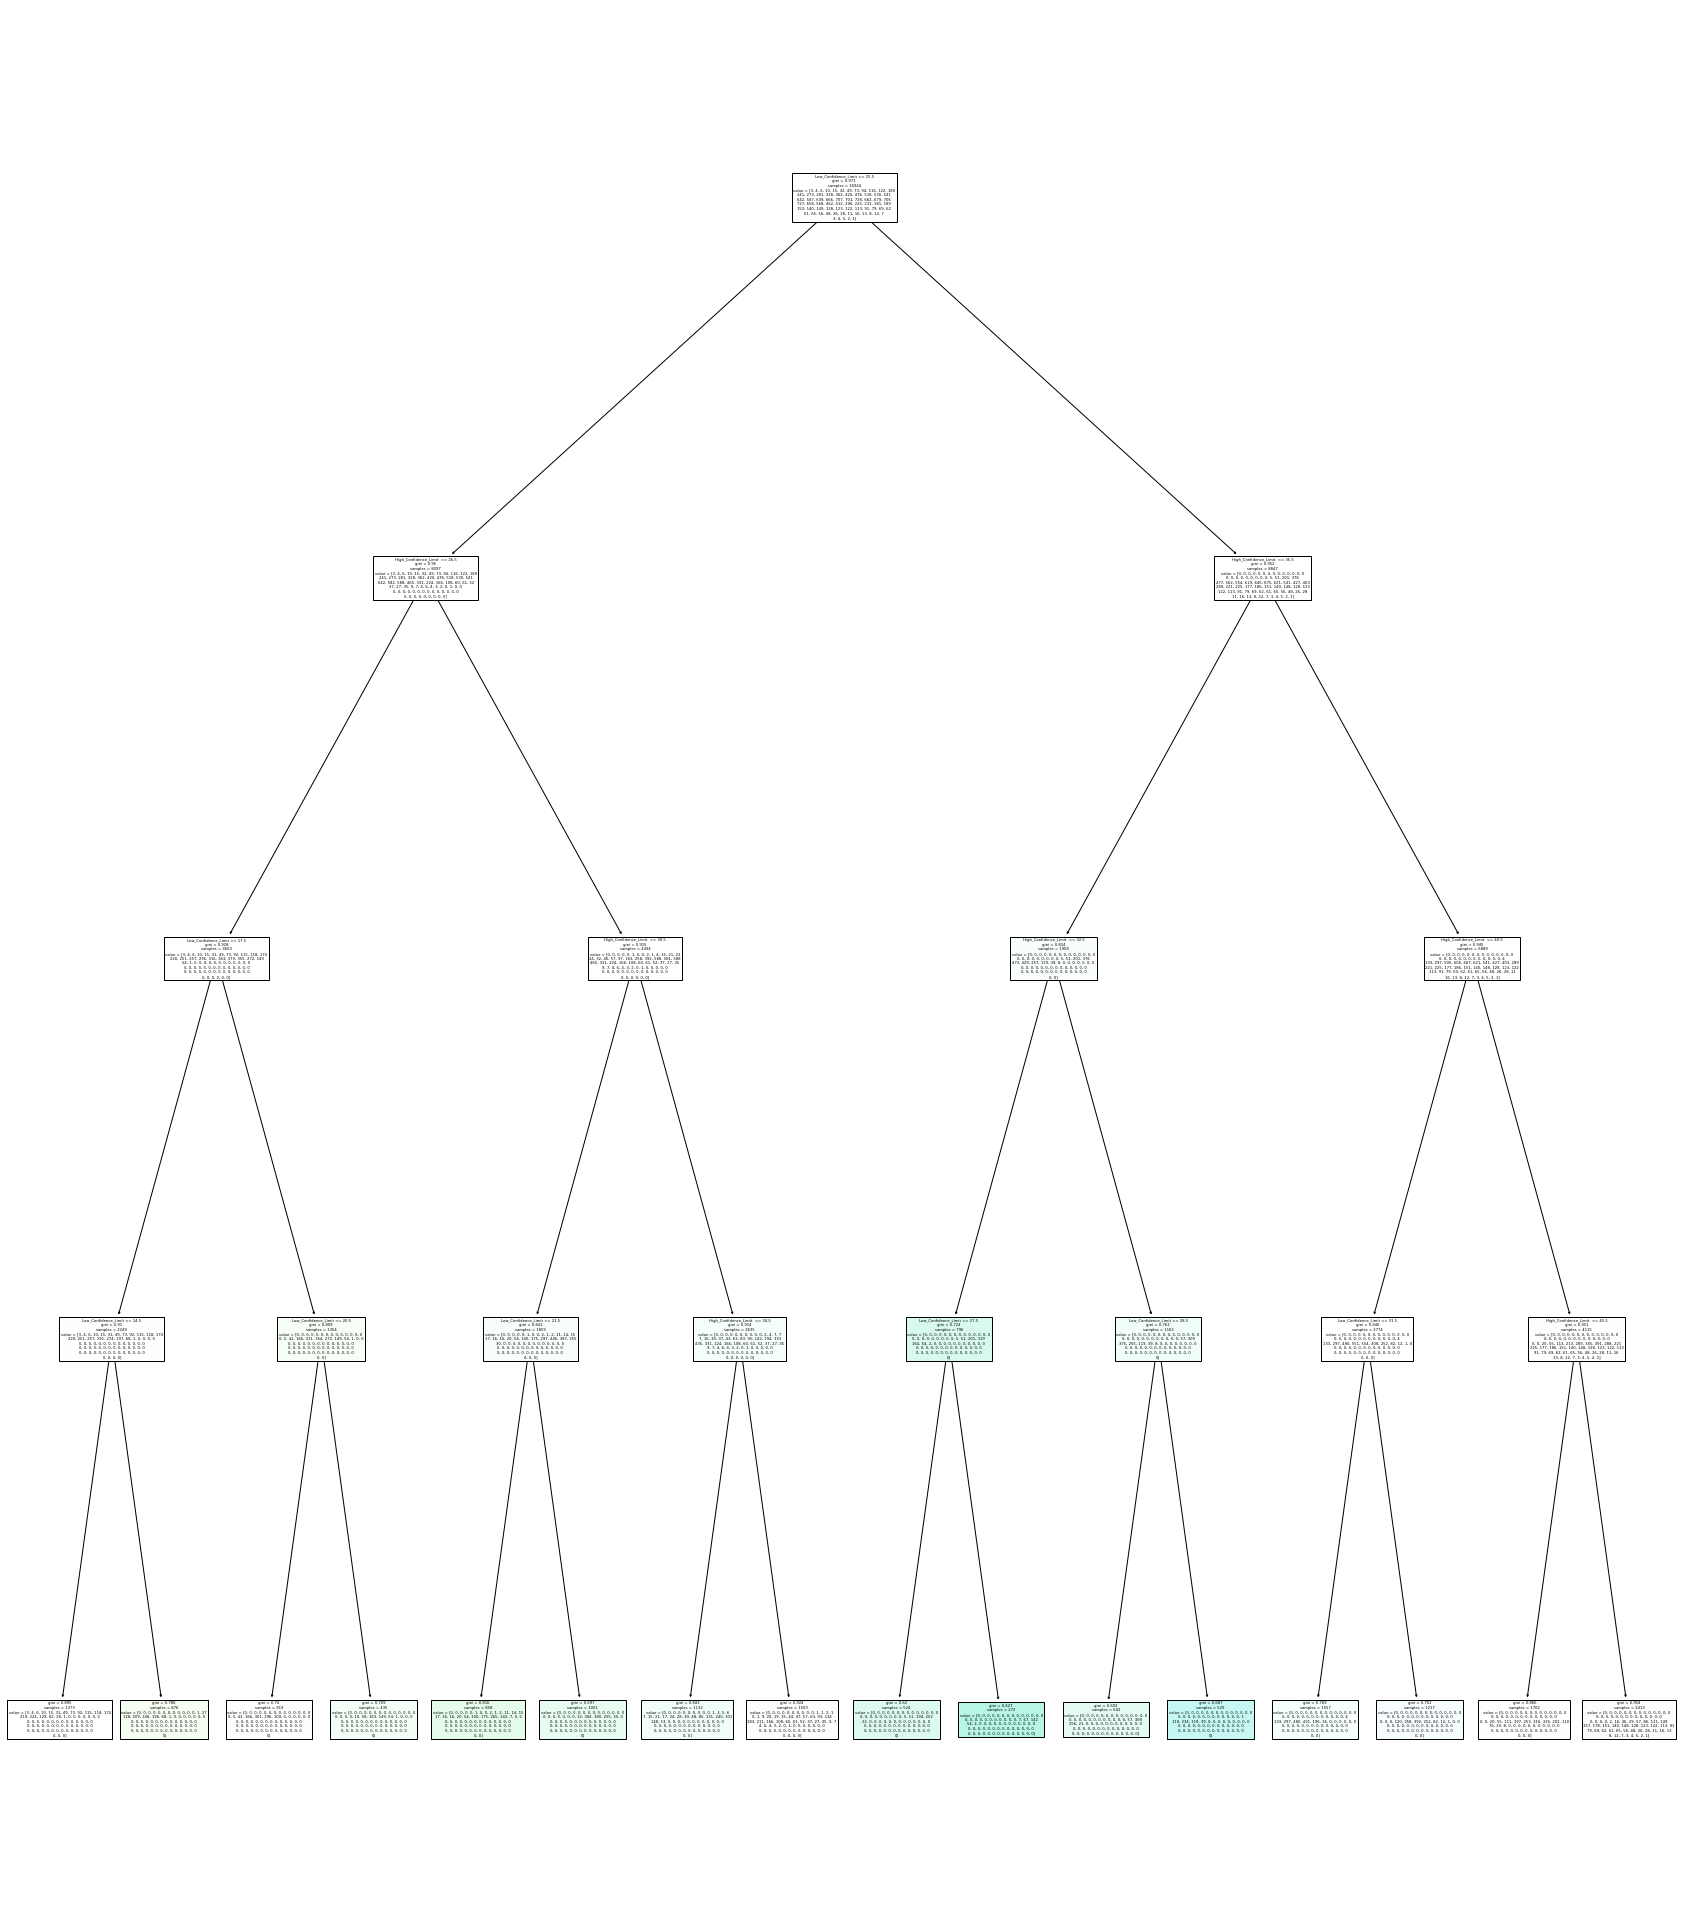

In [65]:
fig = plt.figure(figsize=(30,35))
model_entropy_graph = tree.plot_tree(model, feature_names=x_train.columns, filled=True)

3.2 Improve the models 

C:\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Data_Value', ylabel='Density'>

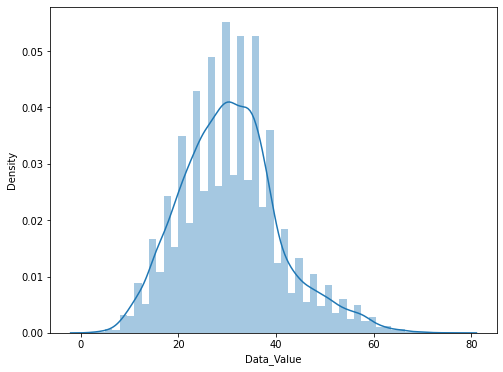

In [66]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(dataset['Data_Value'])

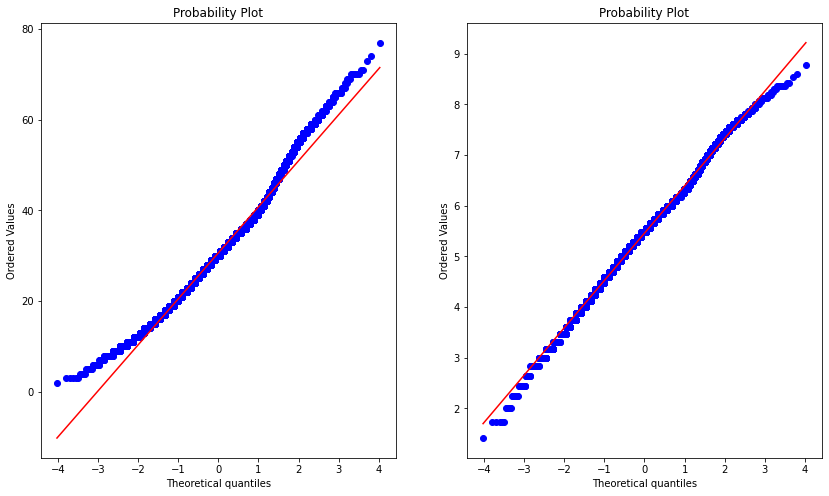

In [67]:
from scipy import stats 

fig = plt.figure(figsize = (14,8))

# Distribution on raw data
fig.add_subplot(1,2,1)
res = stats.probplot(dataset["Data_Value"], plot=plt)

# # Distribution provided that we took the square from 'Data_Value'
fig.add_subplot(1,2,2)
res = stats.probplot(np.sqrt(dataset["Data_Value"]), plot=plt)

In [68]:
dataset['Data_Value'] = np.sqrt(dataset['Data_Value'])

In [69]:
X_dataframe = dataset[['Low_Confidence_Limit', 'High_Confidence_Limit ']]
target = dataset.Data_Value

In [70]:
print("X_dataframe shape:", X_dataframe.shape, "\nTarget value shape:", target.shape)

X_dataframe shape: (24207, 2) 
Target value shape: (24207,)


In [71]:
x_train, x_test, y_train, y_test = train_test_split(X_dataframe, target, test_size=0.3, random_state=18)

In [72]:
lr_model = linear_model.LinearRegression()

In [73]:
print("Train data:",x_train.shape, y_train.shape, "\nTest data:",x_test.shape, y_test.shape)

Train data: (16944, 2) (16944,) 
Test data: (7263, 2) (7263,)


In [74]:
lr_model = linear_model.LinearRegression()

In [75]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [76]:
y_predicted_ls = lr_model.predict(x_test)

In [77]:
lr_model = linear_model.LinearRegression()

In [78]:
print('LinearRegression() MSE train: ', mean_squared_error(y_test, y_predicted_ls), '\nLinearRegression() R^2 train: ', r2_score(y_test, y_predicted_ls))

LinearRegression() MSE train:  0.017350118375136187 
LinearRegression() R^2 train:  0.9803662806409164


In [79]:
print(cross_val_score(lr_model, X_dataframe, target))

[0.97920436 0.98326176 0.97893299 0.98271229 0.97764404]


---

In [80]:
dataset_num = dataset.loc[:, dataset.dtypes != 'object']
finally_dataset = pd.concat([dataset_num, data_cat_labelenc], axis = 1)

In [81]:
finally_dataset.head(3)

,YearStart,YearEnd,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationDesc,Class,Topic,Question,QuestionID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,2011,2011,5.656854,29,34,2581,0,1,1,1,2,2,22,2,18
3,2011,2011,5.744563,29,37,1153,0,1,1,1,2,1,21,1,8
5,2011,2011,5.744563,31,36,1925,0,1,1,1,2,1,26,1,7


In [82]:
X_dataframe = finally_dataset.loc[:, finally_dataset.columns != "Data_Value"]
target = finally_dataset.Data_Value

In [83]:
print("X_dataframe shape:", X_dataframe.shape, "\nTarget value shape:", target.shape)

X_dataframe shape: (24207, 14) 
Target value shape: (24207,)


In [84]:
x_train, x_test, y_train, y_test = train_test_split(X_dataframe, target, test_size=0.3, random_state=18)

In [85]:
lr_model = linear_model.LinearRegression()

In [86]:
print("Train data:",x_train.shape, y_train.shape, "\nTest data:",x_test.shape, y_test.shape)

Train data: (16944, 14) (16944,) 
Test data: (7263, 14) (7263,)


In [87]:
lr_model = linear_model.LinearRegression()

In [88]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [89]:
y_predicted_ls = lr_model.predict(x_test)

In [90]:
lr_model = linear_model.LinearRegression()

In [91]:
print('LinearRegression() MSE train: ', mean_squared_error(y_test, y_predicted_ls), '\nLinearRegression() R^2 train: ', r2_score(y_test, y_predicted_ls))

LinearRegression() MSE train:  0.01514582364494158 
LinearRegression() R^2 train:  0.9828607018996998


In [93]:
print(cross_val_score(lr_model, X_dataframe, target))

[0.981575   0.98557197 0.98151963 0.98518253 0.9809016 ]


---

# 4. Summary

First, we create a working notebook, add cells, names and numbers of tasks through Makrdowns (We are engaged in the initial preparation of the document)<br><br>
After reading our dataset and starting the primary analysis, we look at the values of describe(), info(). After that, we begin to get rid of unnecessary data: columns, empty cells. In this dataset, there are about 18-19 unnecessary and duplicate columns that I deleted. I also deleted about 2500 empty values. In total, I have about 24,000 lines left. It is quite enough for the work and training of the model. After that, I encoded my categorical data using LabelEncoding(), however, I did not use this data, since they have a weak correlation with the TARGET VALUE = [Data_Value]. As a result, I left them to check for paragraph 3.2.<br><br>
The first model is linear regression, by dividing my dataset, I got acceptable values of R^2 approximately equal to one, which indicates a good quality of the model. Crossqualification also showed acceptable values, values. you don't differ from each other too much<br><br>
After I used the DecisionTreeClassifier() model, in order for the values to be accepted by the model, I had to translate the values float to int. After that, the model showed values approximately equal to 0.2. Apparently, the model was not trained enough. We can assume that the best model for this dataset is linear<br><br>
I also tried to improve the model, but something doesn't work, the values only became a hundredth less<br>